# State evolution after MI
Interested in finding out how state evolves after MI, to see if they will end up in desirable cycling states

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use(["seaborn-dark"])
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["font.family"] = 'serif'

import numpy as np

import centrex_TlF
from centrex_TlF import UncoupledBasisState
from state_prep.electric_fields import ElectricField, E_field_ring, E_field_tanh, E_field_tanhi
from state_prep.hamiltonians import SlowHamiltonian
from state_prep.magnetic_fields import MagneticField, Bx_field_tanh, Bx_field_tanh_decay
from state_prep.simulator import Simulator
from state_prep.trajectory import Trajectory
from state_prep.utils import vector_to_state

## Testing

In [358]:
# initial eletric field in V/cm
V1 = 300
V2 = 30000
Vc = 0
#initial distance
z1 = 0
E = np.array((0,0,V1))
decayl = 1

# define trajectory of molecules
trajectory = Trajectory(Rini = np.array((0,0,0)), Vini = np.array((0,0,184.)), zfin = decayl*50)

In [359]:
# defining an decaying electric field in the form of 1 - tanh(z)
# E_R = lambda R: E_field_tanhi(R, z0 = decayl*300, V = V2, l = decayl*10 )+ 0.5*E_field_tanh(R, z0 = decayl*10, V = V1, l = decayl ) + E_field_tanh(R, z0 = z1, V = Vc, l = decayl*1000000  )
E_R = lambda R: np.repeat(E.reshape(3,1),R.shape[1], axis = 1)
electric_field = ElectricField(E_R)

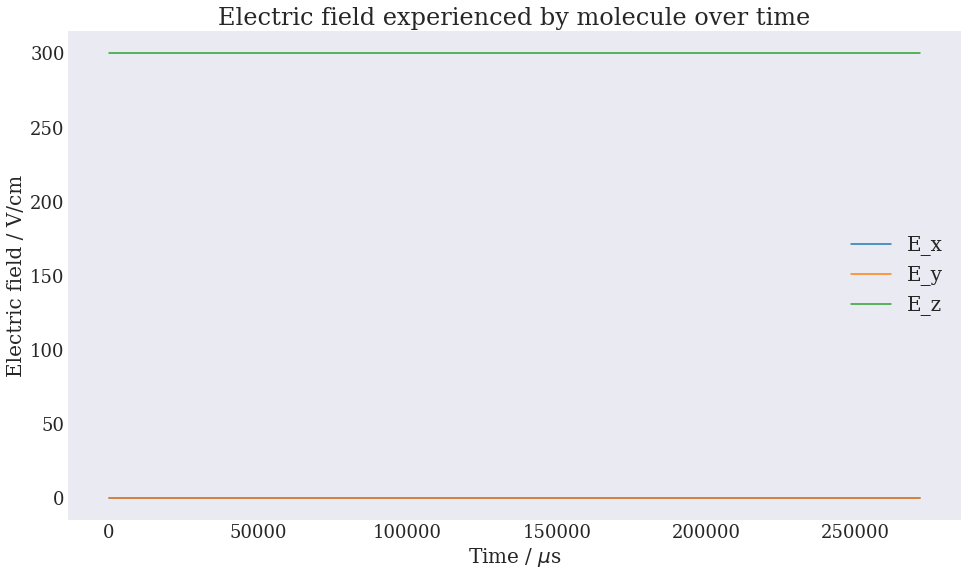

In [360]:
# Plot the electric field as a check:
electric_field.plot(trajectory)

In [532]:
# initial eletric field in V/cm
Bz = 3
Bx = 2
By = 0
Bc = 0
#initial distance
z1 = 0
decaylb = decayl
# define trajectory of molecules

B = np.array((1,0,0.1))
#E_field_tanh(R, z0 = 0, V = B1, l = decayl  ) + 
# defining an decaying electric field in the form of 1 - tanh(z)

B_R = lambda R:(0.5 * E_field_tanh(R, z0 = decaylb*5, V = Bz, l = decayl/10000)+ np.repeat(B.reshape(3,1),R.shape[1], axis = 1)
                + Bx_field_tanh_decay(R, x0 = decaylb*10, B0 = Bx, l = decaylb))
# B_R = lambda R: np.repeat(B.reshape(3,1),R.shape[1], axis = 1)
magnetic_field = MagneticField(B_R)

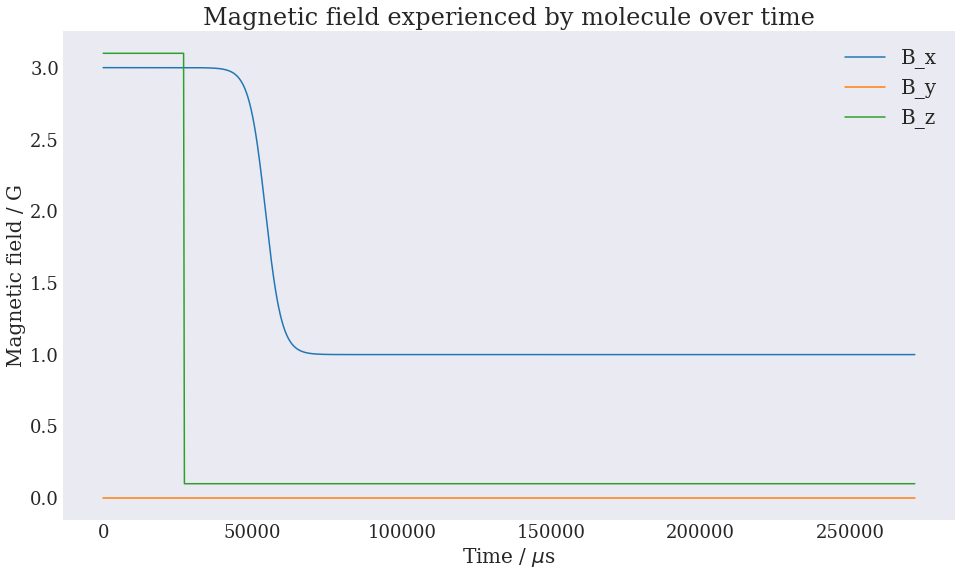

In [533]:
magnetic_field.plot(trajectory)

## Initial states
Define approximate initial states here.

In [534]:
#Define some useful approximate states
#J2_singlet = (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X')) + (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
#J1_up = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
J1_pmp = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
J1_mpm = (1*UncoupledBasisState(J = 1, mJ = -1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X'))
J1_pmm = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X'))
J1_mpp = (1*UncoupledBasisState(J = 1, mJ = -1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
J1_ppm = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X'))
J1_mmp = (1*UncoupledBasisState(J = 1, mJ = -1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
J1_ppp = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))
initial_states_approx = [J1_pmp, J1_mpm, J1_pmm, J1_mpp, J1_ppm, J1_mmp, J1_ppp]

In [535]:
#Define some useful approximate states
J2_singlet = (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = 1, Omega = 0, electronic_state='X')) + (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = 1, Omega = 0, electronic_state='X'))
J2_triplet = (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = 1, Omega = 0, electronic_state='X')) - (1/np.sqrt(2)*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = 1, Omega = 0, electronic_state='X'))
J2_triplet_pp = (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = 1, Omega = 0, electronic_state='X'))
J2_triplet_mm = (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = 1, Omega = 0, electronic_state='X'))
initial_states_approx_J2 = [J2_singlet, J2_triplet,J2_triplet_pp,J2_triplet_mm]

## Define slowly varying Hamiltonian
Define a Hamiltonian object that represents the slowly varying part of the Hamiltonian (i.e. everything except the microwaves). Using J = 0-3 here since we're interested in the time-evolution of J = 2 states; J = 1 and 3 are absolutely required since the electric field couples J = 2 to these, J = 0 is not strictly necessary. Since the Stark energies are << the rotational energies, we mostly just need the J of interest $\pm 1$.

In [536]:
Js = [0,1,2,3]
hamiltonian = SlowHamiltonian(Js,trajectory, electric_field, magnetic_field)

## Time-evolution
Next define a Simulator and use it to numerically integrate the Schroedinger equation to see how the states evolve as the electric field is ramped down. 

In [537]:
simulator = Simulator(trajectory, electric_field, magnetic_field, initial_states_approx, hamiltonian)

In [538]:
result = simulator.run()

100%|████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:08<00:00, 1208.78it/s]


## Results

In [539]:
H = result.hamiltonian
H_t = H.get_H_t_func()
# get indices for states of interest
QN = result.hamiltonian.QN

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)

idxes = centrex_TlF.states.find_states_idxs_from_states(H_t(0), initial_states_approx, QN)
# get arrays or energy and field for plotting
energies_t = result.energies[:,idxes] - result.energies[-1,idxes[0]]
b = magnetic_field.get_B_R(trajectory.R_t(t_array))

Text(0, 0.5, 'Relative Energy [kHz]')

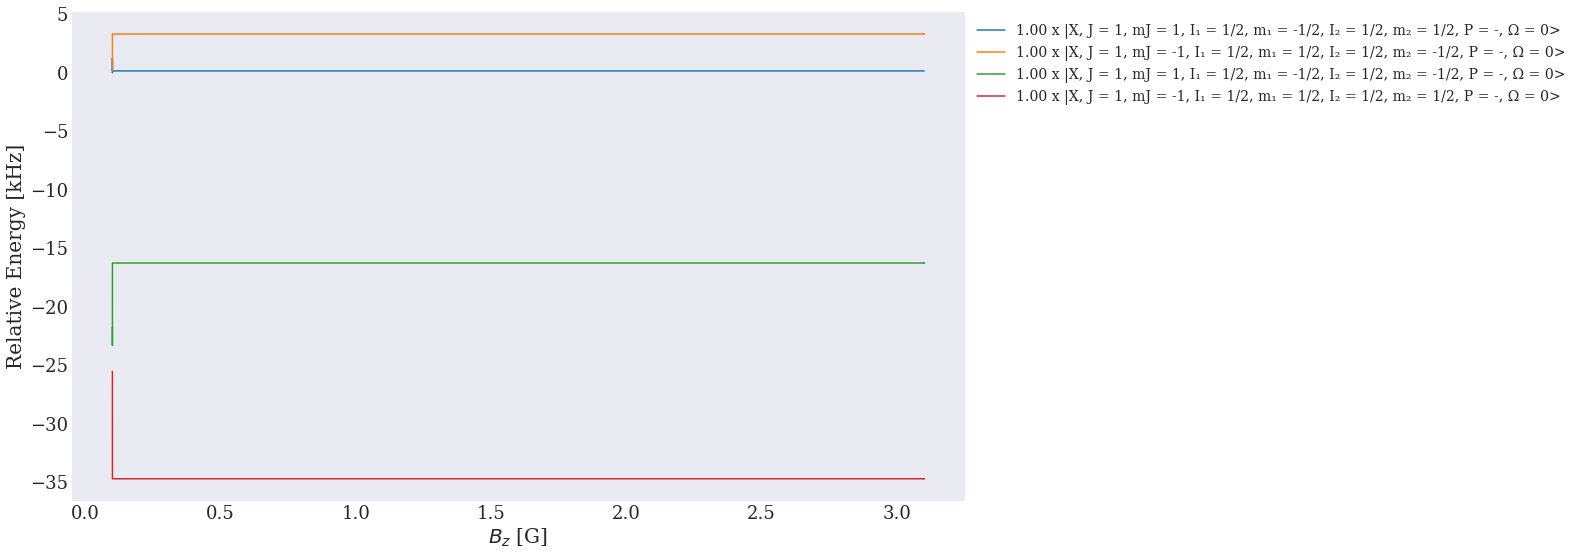

In [540]:
fig, ax = plt.subplots()
ax.plot(b[2], energies_t[:,0]/1000/2/np.pi, label = J1_pmp)
ax.plot(b[2], energies_t[:,1]/1000/2/np.pi, label = J1_mpm)
ax.plot(b[2], energies_t[:,2]/1000/2/np.pi, label = J1_pmm)
ax.plot(b[2], energies_t[:,3]/1000/2/np.pi, label = J1_mpp)
# ax.plot(b[2], energies_t[:,4]/1000/2/np.pi, label = J1_ppm)
# ax.plot(b[2], energies_t[:,5]/1000/2/np.pi, label = J1_mmp)
# ax.plot(b[2], energies_t[:,6]/1000/2/np.pi, label = J1_ppp)

ax.legend(fontsize = 14, bbox_to_anchor = (1,1))
plt.xlabel('$B_z$ [G]')
plt.ylabel('Relative Energy [kHz]')

In [541]:
print('energy splitting between pmp and mpm @ 4.5 G =',(energies_t[-1,0]-energies_t[0,1])/1000/2/np.pi,'kHz')

energy splitting between pmp and mpm @ 4.5 G = -3.30205836630161 kHz


In [542]:
idxes_J2 = centrex_TlF.states.find_states_idxs_from_states(H_t(0), initial_states_approx_J2, QN)
# get arrays or energy and field for plotting
energies_t_J2 = result.energies[:,idxes_J2] - result.energies[-1,idxes_J2[0]]
b = magnetic_field.get_B_R(trajectory.R_t(t_array))

Text(0, 0.5, 'Relative Energy [kHz]')

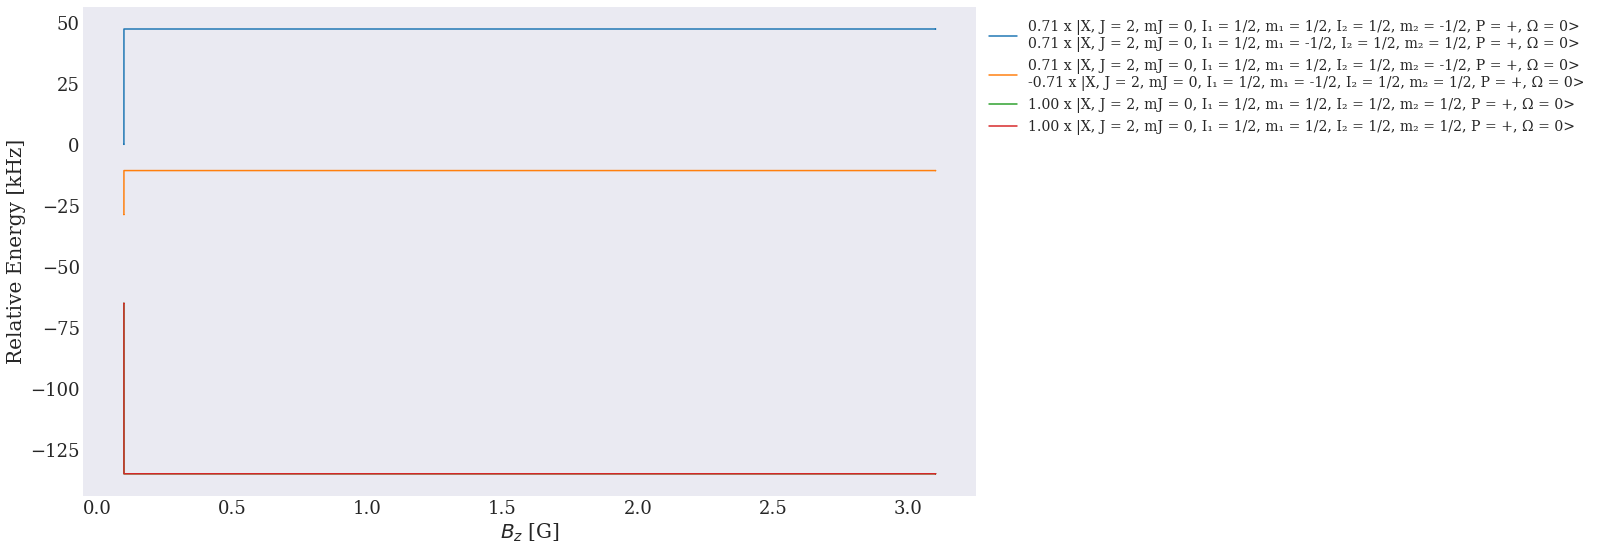

In [543]:
fig, ax = plt.subplots()
ax.plot(b[2], energies_t_J2[:,0]/1000, label = J2_singlet)
ax.plot(b[2], energies_t_J2[:,1]/1000, label = J2_triplet)
ax.plot(b[2], energies_t_J2[:,2]/1000, label = J2_triplet_pp)
ax.plot(b[2], energies_t_J2[:,3]/1000, label = J2_triplet_mm)

ax.legend(fontsize = 14, bbox_to_anchor = (1,1))
plt.xlabel('$B_z$ [G]')
plt.ylabel('Relative Energy [kHz]')

First we look at how the eigenstates evolve in time, the states are labeled its initial eigenstate. 

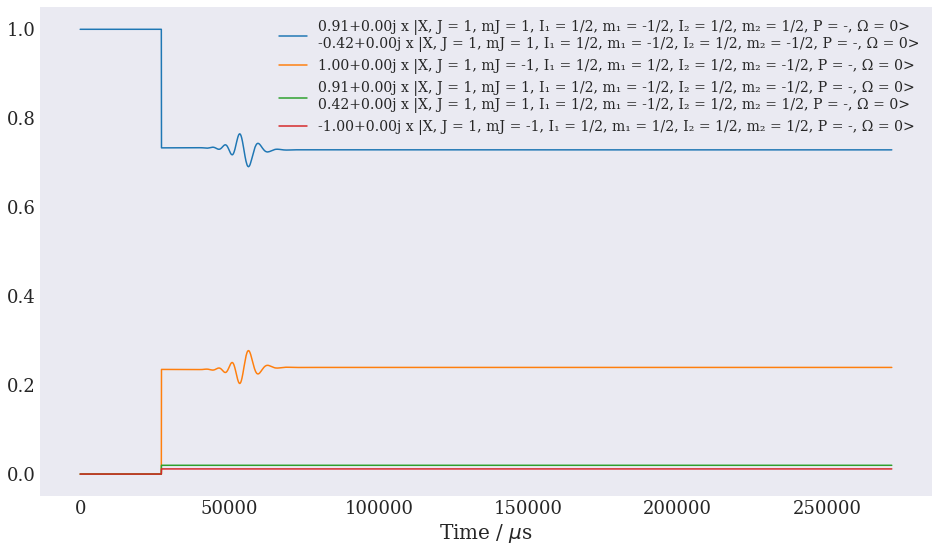

In [544]:
# evolution of (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

initial_state = result.initial_states[0]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.2)
ax.legend(fontsize = 14, bbox_to_anchor = (1,1))

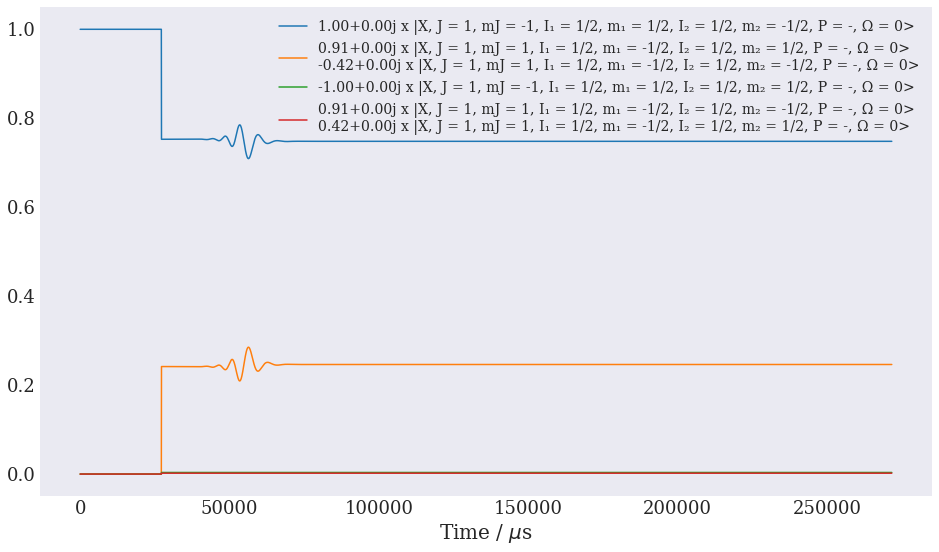

In [545]:
# evolution of (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

initial_state = result.initial_states[1]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.2)
ax.legend(fontsize = 14, bbox_to_anchor = (1,1))

Text(0, 0.5, '<mJ>')

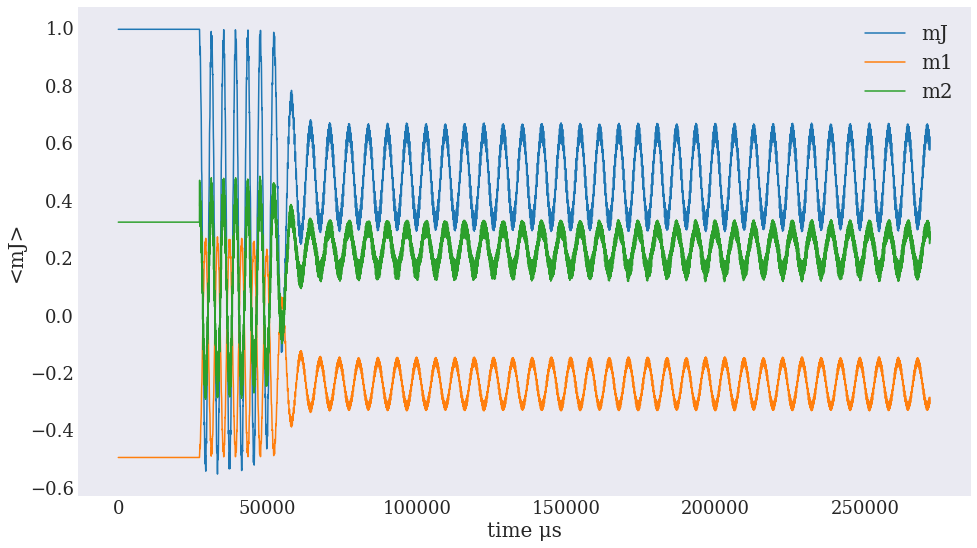

In [546]:
# plotting the expected mJ value over time

STATENUMBER = 0
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].mJ)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime, label = 'mJ')

STATENUMBER = 0
mtime1 = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m1)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime1.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime1, label = 'm1')

STATENUMBER = 0
mtime2 = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m2)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime2.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime2, label = 'm2')
plt.legend()
plt.xlabel('time μs')
plt.ylabel('<mJ>')

Text(0, 0.5, '<mJ>')

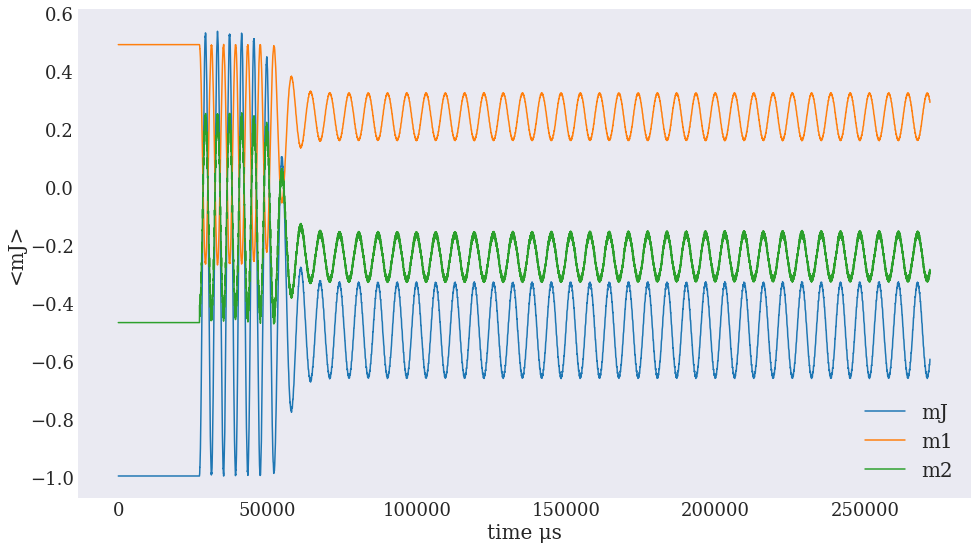

In [547]:
# plotting the expected mJ value over time

STATENUMBER = 1
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].mJ)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime, label = 'mJ')

STATENUMBER = 1
mtime1 = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m1)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime1.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime1, label = 'm1')

STATENUMBER = 1
mtime2 = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m2)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime2.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime2, label = 'm2')
plt.legend()
plt.xlabel('time μs')
plt.ylabel('<mJ>')

Text(0, 0.5, '<mJ>')

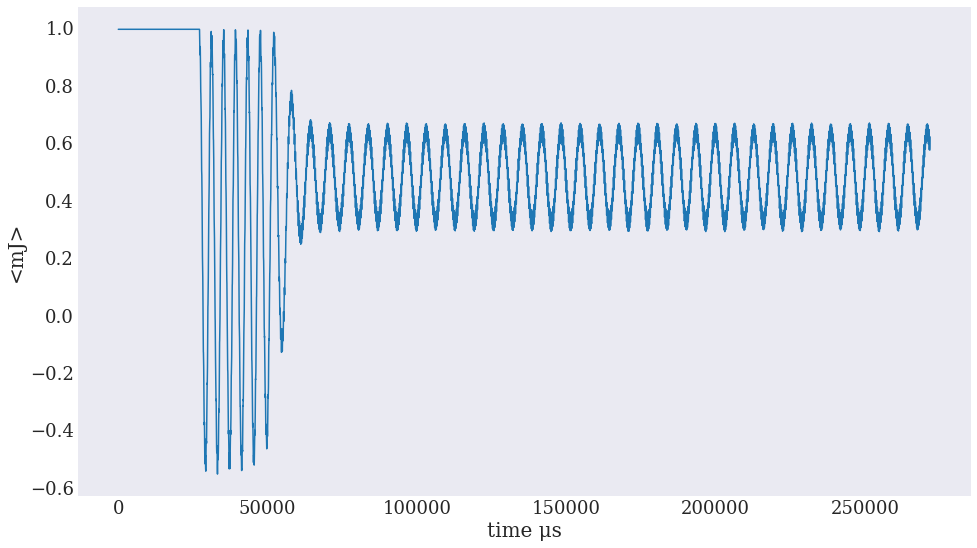

In [548]:
# plotting the expected mJ value over time

STATENUMBER = 0
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].mJ)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<mJ>')

Text(0, 0.5, '<mJ>')

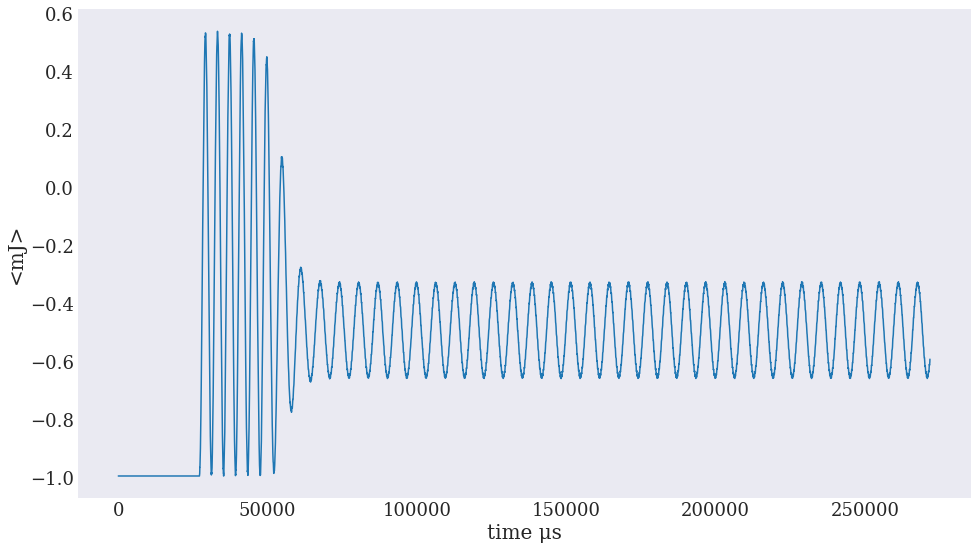

In [549]:
# plotting the expected mJ value over time

STATENUMBER = 1
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].mJ)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<mJ>')

In [550]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[0,0,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(tol =0.01, probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 > ->
+0.8230+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>
+0.1715+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0021+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0019+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0011+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>
+0.0002+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [551]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-1,0,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(tol = 0.01, probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.7809+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>
+0.2017+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0096+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>
+0.0034+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0033+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0009+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [464]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-2,0,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.9955+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [465]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-3,0,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.9955+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [466]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[0,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 > ->
+0.9638+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>
+0.0291+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [467]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-1,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.9950+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>


In [468]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-2,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.9950+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>


In [469]:
QN = result.hamiltonian.QN
final_state_vec_J1_down = result.psis[-3,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN)
                       .order_by_amp())

print('initial -> final')
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_down.print_state(probabilities = True)

initial -> final
|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.9950+0.0000j x |X, J = 1, mJ = -1, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = -, Ω = 0>


In [77]:
J1_0 = (1*UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))


NameError: name 'J1_up' is not defined

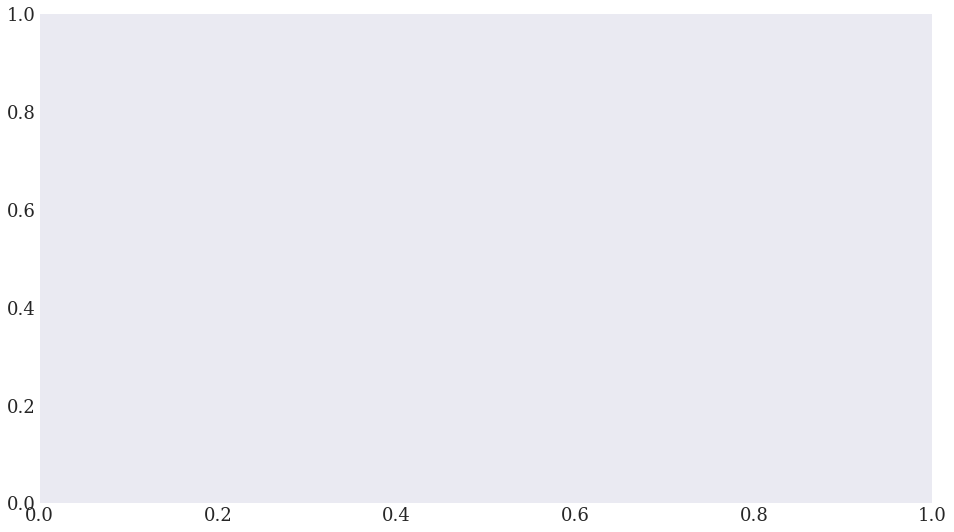

In [78]:
fig, ax = plt.subplots()
result.plot_state_energies([J1_up, J1_0], zero_state = J1_0, ax = ax)
ax.legend(bbox_to_anchor = (1,1))

In [ ]:
# plotting the expected m1 value over time

STATENUMBER = 0
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m1)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<m1>')

In [ ]:
# plotting the expected m2 value over time

STATENUMBER = 0
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m2)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<m2>')

In [ ]:
# plotting the expected m1 value over time

STATENUMBER = 1
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m1)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<m1>')

In [ ]:
# plotting the expected m1 value over time

STATENUMBER = 1
mtime = []
for j in range(len(result.psis[:,0,0])):
    test_state = result.hamiltonian.QN
    mlist = []
    for i in range(len(test_state)):
        mlist.append(test_state[i].m2)
    expectedmJ = np.sum(np.abs(result.psis[j,STATENUMBER,:])**2 * mlist)
    mtime.append(expectedmJ)

T = trajectory.get_T()
t_array = np.linspace(0,T,10000)
plt.plot(t_array/1e-6,mtime)
plt.xlabel('time μs')
plt.ylabel('<m1>')

### SPB flat field region conclusion: Once the state is transferred into J=1 mJ=2, all the spin states will undergo very tiny precession due to a finite orthogonal B field. But the rate of precession will not be relevant